<a href="https://colab.research.google.com/github/namozhdehi/Amazon-Fine-Food-Reviews/blob/main/Store_sales_EDA_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis**

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Load The Data

In [2]:
df=pd.read_csv(r"train.csv")

# Explore The Data

In [3]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [5]:
df.shape

(1017209, 9)

In [6]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

# **Variable Identification and Typecasting**

In [7]:
df.dtypes

,0
Store,int64
DayOfWeek,int64
Date,object
Sales,int64
Customers,int64
Open,int64
Promo,int64
StateHoliday,object
SchoolHoliday,int64


**dtype:** object

There are some variables visible at each types, so let's narrow this down by looking at one datatype at once. We will start with int

# **Integer Data Type**

In [8]:
df.dtypes[df.dtypes == 'int64']

,0
Store,int64
DayOfWeek,int64
Sales,int64
Customers,int64
Open,int64
Promo,int64
SchoolHoliday,int64


**dtype:** int

**Summary:**

*   **Store:** Correct data type (integer).
*   **DayOfWeek:** Correct data type (integer).
*   **Sales:** Correct data type (integer).
*   **Customers:** Correct data type (integer).
*   **Open:** Correct data type (integer).
*   **Promo:** Correct data type (integer).
*   **SchoolHoliday:** Correct data type (integer).

In [9]:
df.dtypes[df.dtypes == 'object']

,0
Date,object
StateHoliday,object


dtype: object
Summary:

*   **Date** column is expected to be in the format of a string so, it need to be converted to datetime format.

*   **StateHoliday** column is currently represented as an object (likely because it contains categorical values like '0', 'a', 'b', 'c'). This column can be converted to a categorical data type to reduce memory usage and optimize processing time during analysis.

# **Date related variables**

In [10]:
# Convert date field to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


# **Object related variables**

In [11]:
df['StateHoliday'].value_counts()

,count
StateHoliday,
0,855087
0,131072
a,20260
b,6690
c,4100


In [12]:
# Replace 'a', 'b', 'c' with 1, 2, 3
df['StateHoliday'] = df['StateHoliday'].replace({'a': 1, 'b': 2, 'c': 3})

df['StateHoliday'] = df['StateHoliday'].astype(int)


df['StateHoliday'].value_counts()

,count
StateHoliday,
0,986159
1,20260
2,6690
3,4100


# **Univariate Analysis: Numerical Variables**

In [13]:
# Numerical datatypes
df.select_dtypes(include=['int32', 'int64', 'float64','Int64']).dtypes

,0
Store,int64
DayOfWeek,int64
Sales,int64
Customers,int64
Open,int64
Promo,int64
StateHoliday,int64
SchoolHoliday,int64


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def UVA_numeric(data, var_group):
    """
    This function takes a dataframe and a variable group as arguments
    and converts the variable group to numeric.
    It then calculates the descriptives of the variable.
    """
    size = len(var_group)
    cols = 4  # Number of columns per row
    rows = (size // cols) + (size % cols > 0)  # Calculate number of rows needed

    plt.figure(figsize=(7*cols, 5*rows), dpi=100)

    for j, i in enumerate(var_group):
        # Check if the column exists in the DataFrame
        if i not in data.columns:
            print(f"Column '{i}' not found in the DataFrame.")
            continue

        try:
            # Attempt to convert the column to numeric
            data[i] = pd.to_numeric(data[i], errors='coerce')
        except TypeError as e:
            # Handle TypeError, print the original exception and problematic value
            print(f"Error converting column '{i}': {e}")
            problematic_value = data[i].iloc[0]  # Get the first problematic value
            print(f"Problematic value: {problematic_value}, Type: {type(problematic_value)}")
            continue

        # Calculating descriptives of variable
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max() - data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()

        # Calculating points of standard deviation
        points = mean - st_dev, mean + st_dev

        # Plotting the variable with every information
        plt.subplot(rows, cols, j + 1)
        sns.kdeplot(data[i], shade=True)

        # Plotting standard deviation, min/max, mean, and median using lines
        plt.axvline(x=points[0], color='black', linestyle='--', label="std_dev")
        plt.axvline(x=points[1], color='black', linestyle='--')
        plt.axvline(x=mini, color='orange', linestyle='-', label="min/max")
        plt.axvline(x=maxi, color='orange', linestyle='-')
        plt.axvline(x=mean, color='red', linestyle='-', label="mean")
        plt.axvline(x=median, color='blue', linestyle='-', label="median")

        plt.xlabel('{}'.format(i), fontsize=20)
        plt.ylabel('density')
        plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format(
            (round(points[0], 2), round(points[1], 2)),
            round(kurt, 2),
            round(skew, 2),
            (round(mini, 2), round(maxi, 2), round(ran, 2)),
            round(mean, 2),
            round(median, 2)))

        plt.legend(loc='upper right')  # Place the legend in the upper right corner

    plt.tight_layout()
    plt.show()

**Univariate Analysis**

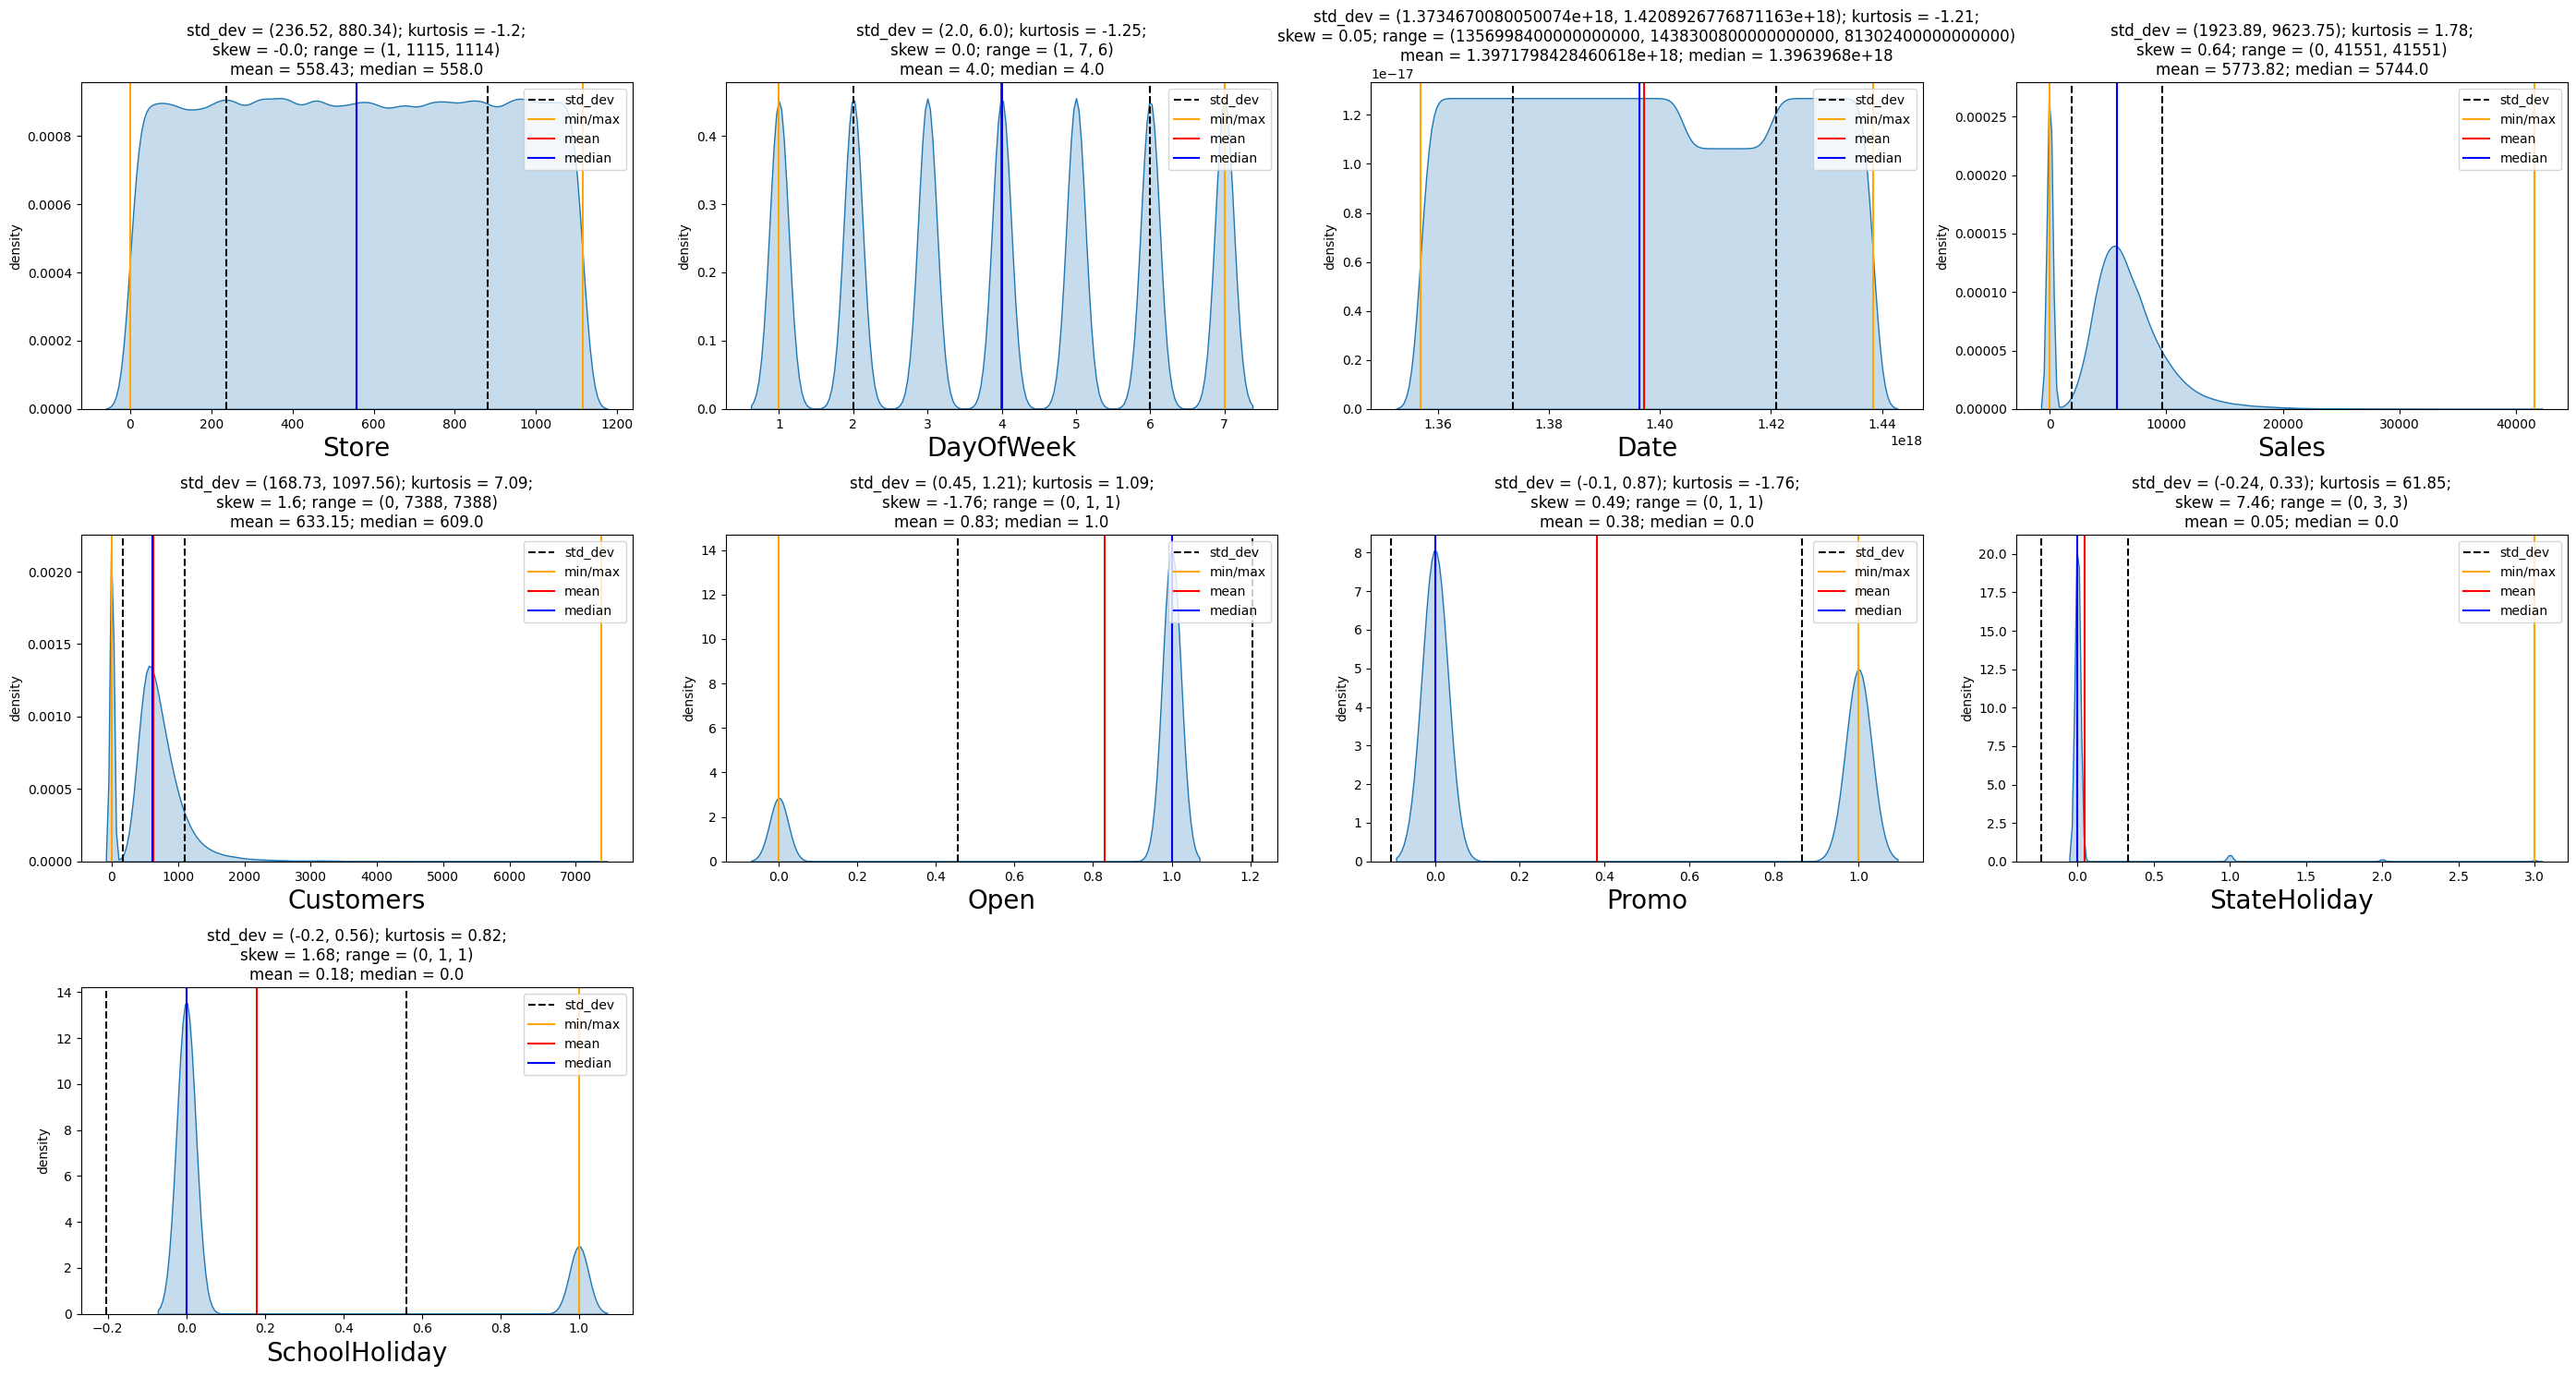

In [15]:
store_col = df.columns
UVA_numeric(df,store_col)

**Summary**

**Store**

*   **Distribution:** The Store numbers range widely from 1 to over 1100, indicating a large dataset of different store locations.
*   **Mean & Median:** The median store index is 558, suggesting that store distribution is fairly uniform across the dataset.
*   **Skewness:** Skewness is close to 0, indicating a fairly symmetrical distribution of stores within the dataset.
*   **Kurtosis:** A kurtosis of -1.2 suggests a platykurtic distribution, meaning that the data has lighter tails and a flatter peak compared to a normal distribution.

**DayOfWeek**

*   **Distribution:** Day of the Week values are evenly spread from 1 to 7, which represent days from Monday to Sunday.
*   **Mean & Median:** Both mean and median are around 4, which corresponds to the mid-week, showing a uniform distribution of data across all days of the week.
*   **Skewness & Kurtosis:** Both values are close to 0, suggesting a uniform distribution without significant outliers.

**Date**
*   **Distribution:** The 'Date' field is showing a very wide range, which might indicate improper handling of date values as numerical data.
*   **Mean & Median:** The mean and median of this field are extremely large values, which indicates the dates are being treated as numerical values rather than dates.
*   **Skewness:** The skewness is 0.05, showing a slight right skew.
*   **Kurtosis:** Kurtosis is -1.21, indicating the distribution is slightly flatter than normal.


**Sales**

*   **Distribution:** Sales vary significantly, with some stores having no sales (possibly closed) and others reaching up to 40,000.
*   **Mean & Median:** Sales average around 5,773 with a median of 5,744, indicating typical sales values cluster below the mean due to a right-skewed distribution.
*   **Skewness:** A positive skew indicates that most stores have low sales, with fewer stores achieving very high sales.
*   **Kurtosis:** A high kurtosis indicates a peak in sales distribution, with more outliers on the higher sales end.


**Customers**

*   **Distribution:** Similar to sales, the customer count per store varies widely from 0 to around 7,000.
*   **Mean & Median:** Mean customer count is around 633, slightly higher than the median of 609, suggesting a right-skewed distribution.
*   **Skewness:** Positive skewness reflects more stores with fewer customers and fewer instances of extremely high customer traffic.
*   **Kurtosis:** The distribution's peak and the presence of outliers with very high customer counts are confirmed by a high kurtosis value.


**Open**
*   **Distribution:** Most stores are either fully open or fully closed on a given day, as indicated by the binary values.
Mean & Median:** The mean is 0.83, indicating most stores are open on most days.
*   **Skewness:** Skewness is -1.76, showing a left skew where more days have open stores than closed ones.
*   **Kurtosis:** Kurtosis is 1.09, indicating a relatively normal distribution for this binary variable.

**Promo**
*   **Distribution:** Promo values indicate whether a store is running a promotion. Most stores are not running promotions.
*   **Mean & Median:** The mean is 0.38, and the median is 0.0, indicating that most days do not have promotions.
*   **Skewness:** Skewness is 0.49, showing a slight right skew.
*   **Kurtosis:** Kurtosis is -1.76, indicating a flat distribution, typical of binary data.


**StateHoliday**
*   **Distribution:** The 'StateHoliday' field is mostly zeros (no holiday) with a few instances of special holidays.
*   **Mean & Median:** The mean value is 0.05, and the median is 0.0, indicating that most days are not holidays.
*   **Skewness:** The skewness is 7.46, showing a strong right skew due to the majority of non-holiday days.
*   **Kurtosis:** Kurtosis is 61.85, indicating a sharp peak with very few days being holidays.


**SchoolHoliday**
*   **Distribution:** Most days are not school holidays.
*   **Mean & Median:** The mean is 0.18, and the median is 0.0, indicating that the majority of days do not coincide with school holidays.
*   **Skewness:** The skewness is 1.68, indicating a right skew, with more days being non-holidays.
*   **Kurtosis:** Kurtosis is 0.82, suggesting a fairly normal distribution for this binary variable.

# **Univariate Analysis : Categorical Varibales**

In [18]:
def UVA_category(data, var_group):
    '''
    countplot_category
    takes a group of variables (category) and plots count plots for each variable.
    '''

    size = len(var_group)
    plt.figure(figsize=(7 * size, 5), dpi=100)

    # For every variable
    for j, i in enumerate(var_group):
        plt.subplot(1, size, j + 1)
        # Use the 'viridis' palette for vibrant colors
        line = sns.countplot(x=data[i], palette='viridis')
        line.set_ylabel("Count", fontsize=15)
        line.set_xlabel(f"{i}", fontsize=15)
        line.set_title(f'{i} Count', fontsize=20)

    plt.tight_layout()
    plt.show()

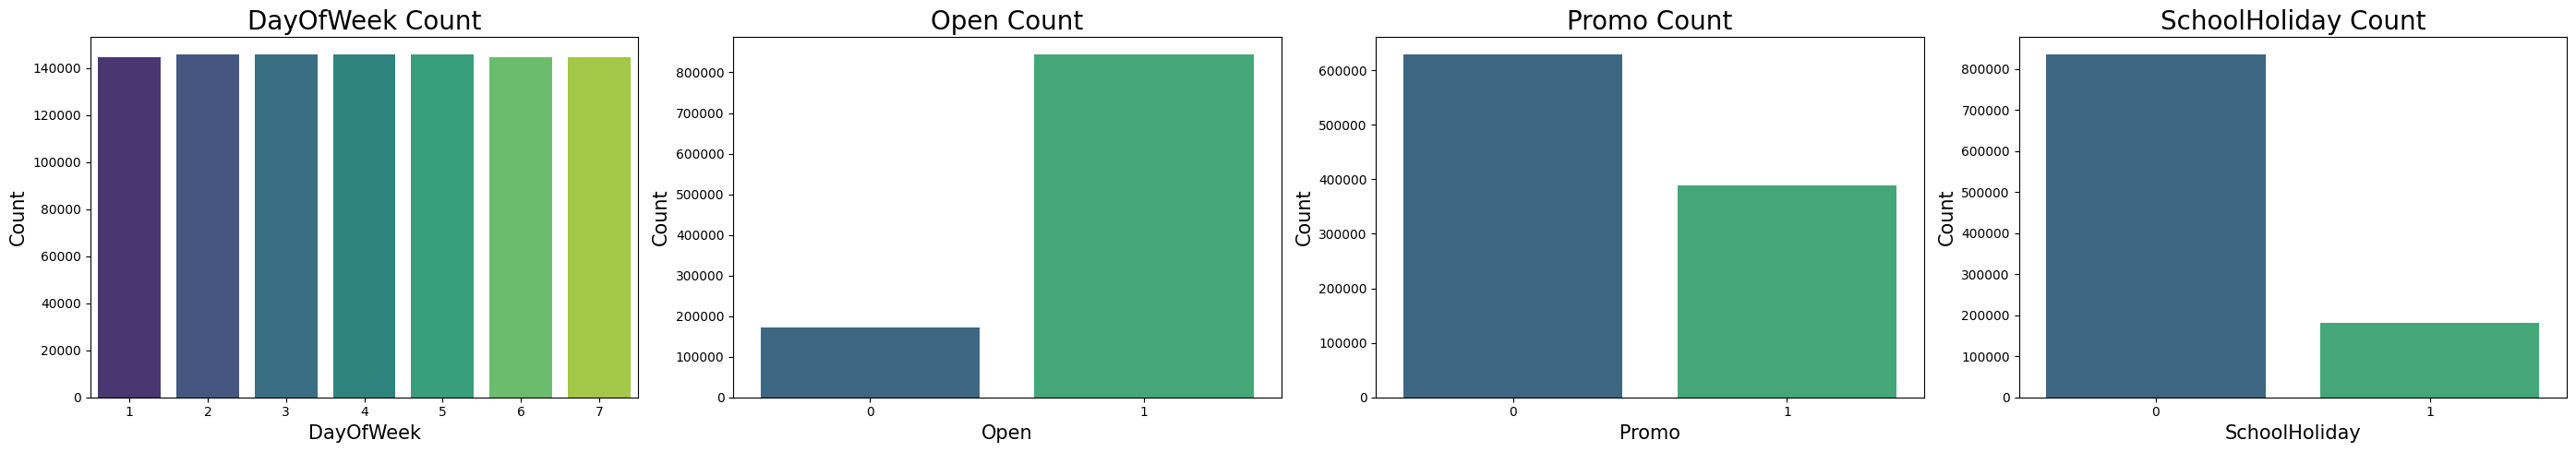

In [19]:
categorical_columns = ['DayOfWeek', 'Open', 'Promo', 'SchoolHoliday']
UVA_category(df, categorical_columns)

**Summary**

**DayOfWeek**

*   **Distribution:** The distribution across the days of the week is quite uniform, with similar numbers of records for each day.

**Open**
*   **Distribution:** A large proportion of the stores are open, with a significant difference between open (1) and closed (0) stores.

**Promo**
*   **Distribution:** There is a reasonable balance between stores running promotions (1) and those not running promotions (0), although the majority of data represents non-promotional periods.

**SchoolHoliday**

*   **Distribution:** The majority of the records fall under non-school holiday periods (0), with only a smaller portion representing school holidays (1).

# **Encoding**

In [16]:
# Perform dummy encoding for the 'StateHoliday' column
df = pd.get_dummies(df, columns=['StateHoliday'], prefix='StateHoliday', drop_first=True)

# Change the data type of all columns to int, except the 'Date' column
for col in df.columns:
    if col != 'Date':
        df[col] = df[col].astype(int)

# Verify the result by checking the first few rows
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_1,StateHoliday_2,StateHoliday_3
0,1,5,1438300800000000000,5263,555,1,1,1,0,0,0
1,2,5,1438300800000000000,6064,625,1,1,1,0,0,0
2,3,5,1438300800000000000,8314,821,1,1,1,0,0,0
3,4,5,1438300800000000000,13995,1498,1,1,1,0,0,0
4,5,5,1438300800000000000,4822,559,1,1,1,0,0,0
